In [2]:
import requests
import pandas as pd

API_KEY = 'L52IL7AG5BBGI1AI'
symbol = 'AAPL'  # Example stock symbol

# Function to fetch data
def fetch_stock_data(symbol):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=5min&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    return data

stock_data = fetch_stock_data(symbol)


In [3]:
def process_data(data):
    time_series = data['Time Series (5min)']
    df = pd.DataFrame.from_dict(time_series, orient='index', dtype=float)
    df.index = pd.to_datetime(df.index)
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df.sort_index(inplace=True)
    return df

df = process_data(stock_data)
print(df.head())


                        Open     High      Low    Close    Volume
2024-08-16 11:40:00  225.468  225.690  225.440  225.630  447839.0
2024-08-16 11:45:00  225.630  225.780  225.550  225.550  425480.0
2024-08-16 11:50:00  225.546  225.890  225.430  225.861  478889.0
2024-08-16 11:55:00  225.870  226.040  225.855  225.915  457312.0
2024-08-16 12:00:00  225.910  226.014  225.780  226.000  333815.0


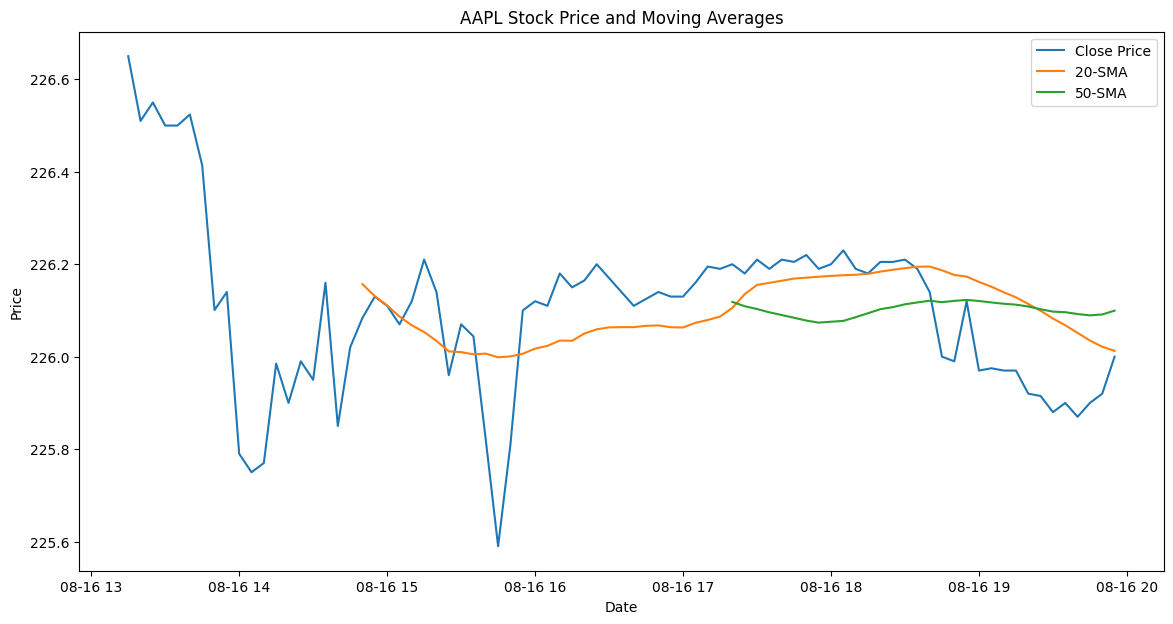

In [24]:
df['20_SMA'] = df['Close'].rolling(window=20).mean()  # 20-period simple moving average
df['50_SMA'] = df['Close'].rolling(window=50).mean()  # 50-period simple moving average

# Plotting with Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['20_SMA'], label='20-SMA')
plt.plot(df.index, df['50_SMA'], label='50-SMA')
plt.title(f'{symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [25]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=df.index, y=df['20_SMA'], mode='lines', name='20-SMA'))
fig.add_trace(go.Scatter(x=df.index, y=df['50_SMA'], mode='lines', name='50-SMA'))

fig.update_layout(title=f'{symbol} Stock Price and Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  template='plotly_dark')

fig.show()


In [18]:
df['20_SMA'] = df['Close'].rolling(window=20).mean()


In [19]:
print(df.head())  # Inspect the first few rows to check if '20_SMA' is present


                        Open     High      Low    Close    Volume  20_SMA
2024-08-16 11:40:00  225.468  225.690  225.440  225.630  447839.0     NaN
2024-08-16 11:45:00  225.630  225.780  225.550  225.550  425480.0     NaN
2024-08-16 11:50:00  225.546  225.890  225.430  225.861  478889.0     NaN
2024-08-16 11:55:00  225.870  226.040  225.855  225.915  457312.0     NaN
2024-08-16 12:00:00  225.910  226.014  225.780  226.000  333815.0     NaN


In [20]:
df['5_SMA'] = df['Close'].rolling(window=5).mean()


In [21]:
df.dropna(subset=['20_SMA'], inplace=True)


In [22]:
# Adjust the window size to 5 if data points are limited
window_size = 5 if len(df) < 20 else 20

# Calculate the SMA with the adjusted window size
df[f'{window_size}_SMA'] = df['Close'].rolling(window=window_size).mean()

# Plot the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=df.index, y=df[f'{window_size}_SMA'], mode='lines', name=f'{window_size}-SMA'))

fig.update_layout(title='Stock Price and Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  template='plotly_dark')

fig.show()


In [6]:
import plotly.io as pio

# Set the renderer to 'browser' to open plots in your default web browser
# Or set to 'vscode' to render directly in VS Code's plot viewer
pio.renderers.default = 'browser'  # or 'vscode'


In [7]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=df.index, y=df['20_SMA'], mode='lines', name='20-SMA'))
fig.add_trace(go.Scatter(x=df.index, y=df['50_SMA'], mode='lines', name='50-SMA'))

fig.update_layout(title=f'{symbol} Stock Price and Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  template='plotly_dark')

fig.show()


In [8]:
# Calculate Bollinger Bands
df['20_SMA'] = df['Close'].rolling(window=20).mean()
df['stddev'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['20_SMA'] + (df['stddev']*2)
df['Lower Band'] = df['20_SMA'] - (df['stddev']*2)

# Plotting Bollinger Bands
fig.add_trace(go.Scatter(x=df.index, y=df['Upper Band'], mode='lines', name='Upper Bollinger Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['Lower Band'], mode='lines', name='Lower Bollinger Band'))


In [9]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df['RSI'] = calculate_rsi(df['Close'])

# Plotting RSI
fig_rsi = go.Figure()
fig_rsi.add_trace(go.Scatter(x=df.index, y=df['RSI'], mode='lines', name='RSI'))
fig_rsi.update_layout(title=f'{symbol} RSI',
                      xaxis_title='Date',
                      yaxis_title='RSI',
                      template='plotly_dark')
fig_rsi.show()


In [10]:
# Calculate MACD
df['12_EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26_EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12_EMA'] - df['26_EMA']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plotting MACD
fig_macd = go.Figure()
fig_macd.add_trace(go.Scatter(x=df.index, y=df['MACD'], mode='lines', name='MACD'))
fig_macd.add_trace(go.Scatter(x=df.index, y=df['Signal Line'], mode='lines', name='Signal Line'))
fig_macd.update_layout(title=f'{symbol} MACD',
                       xaxis_title='Date',
                       yaxis_title='MACD',
                       template='plotly_dark')
fig_macd.show()


c:\Users\manik\Desktop\Github\Stock Market\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency 5min will be used.

c:\Users\manik\Desktop\Github\Stock Market\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency 5min will be used.

c:\Users\manik\Desktop\Github\Stock Market\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency 5min will be used.



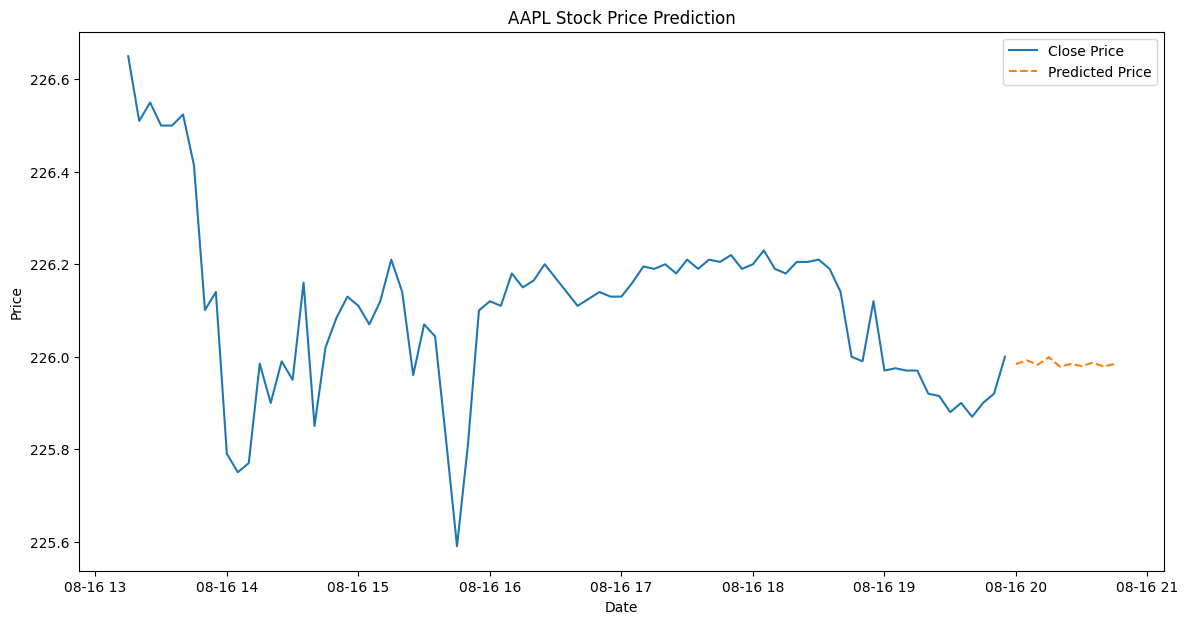

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=10)

# Plotting Predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(predictions.index, predictions, label='Predicted Price', linestyle='--')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [28]:
df.to_csv('stock_data.csv')


In [30]:
import streamlit as st
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf

# Streamlit app setup
st.title("Stock Market Analysis Dashboard")

# User input for stock symbol and date range
symbol = st.text_input("Enter Stock Symbol", "AAPL")
start_date = st.date_input("Start Date", pd.to_datetime('2023-01-01'))
end_date = st.date_input("End Date", pd.to_datetime('2023-12-31'))

# Fetch stock data
@st.cache
def load_data(symbol, start, end):
    df = yf.download(symbol, start=start, end=end)
    return df

df = load_data(symbol, start_date, end_date)

if df.empty:
    st.error("No data found for the symbol.")
else:
    st.write(f"Showing data for {symbol} from {start_date} to {end_date}")

    # Calculate moving averages
    window_size = st.slider("Select Moving Average Window", min_value=5, max_value=50, value=20)
    df[f'{window_size}_SMA'] = df['Close'].rolling(window=window_size).mean()

    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))
    fig.add_trace(go.Scatter(x=df.index, y=df[f'{window_size}_SMA'], mode='lines', name=f'{window_size}-SMA'))

    fig.update_layout(title=f'{symbol} Stock Price and Moving Averages',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      template='plotly_dark')

    st.plotly_chart(fig)


2024-08-19 20:37:56.455 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new caching commands, `st.cache_data` or `st.cache_resource`.
More information [in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching logic used by `st.cache_data` and `st.cache_resource`.
This might lead to some problems or unexpected behavior in certain edge cases.

2024-08-19 20:37:56.458 No runtime found, using MemoryCacheStorageManager
2024-08-19 20:37:56.463 No runtime found, using MemoryCacheStorageManager
[*********************100%%**********************]  1 of 1 completed
